# Linear Discriminant Analysis (LDA)

#### Concept: 
Linear Discriminant Analysis (LDA) is a classification and dimensionality reduction technique that aims to project data points onto a lower-dimensional space while maximizing the separation between multiple classes. It achieves this by finding the linear combinations of features that best separate the classes. LDA assumes that the different classes generate data based on Gaussian distributions with the same covariance matrix.

#### Key Steps
1. Compute the Mean Vectors: Compute the mean vector for each class.
2. Compute the Scatter Matrices:
   - Within-Class Scatter Matrix: Measures the scatter (spread) of features within each class.
   - Between-Class Scatter Matrix: Measures the scatter of the means of each class.
3. Solve the Generalized Eigenvalue Problem: Compute the eigenvalues and eigenvectors for the scatter matrices to find the linear discriminants.
4. Sort and Select Linear Discriminants: Sort the eigenvalues in descending order and select the top eigenvectors to form a matrix of linear discriminants.
5. Project the Data: Transform the original data onto the new subspace using the matrix of linear discriminants.

#### Implementation

Suppose we have the Iris dataset and we want to classify it using Linear Discriminant Analysis.



Accuracy: 1.0
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



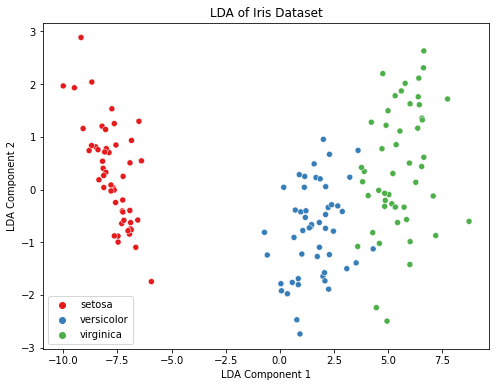

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Making predictions
y_pred = lda.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Transforming the data for visualization
X_lda = lda.transform(X)

# Plotting the LDA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=iris.target_names[y], palette='Set1')
plt.title('LDA of Iris Dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

#### Explanation 

1. Libraries: We import necessary libraries like numpy, pandas, sklearn, matplotlib, and seaborn.
2. Data Preparation: We load the Iris dataset with four features and the target variable (species).
3. Train-Test Split: We split the data into training and testing sets.
4. Model Training: We create a LinearDiscriminantAnalysis model and train it using the training data.
5. Predictions: We use the trained LDA model to predict the species of iris flowers for the test set.
6. Evaluation:
    - Accuracy: Measures the proportion of correctly classified instances.
    - Confusion Matrix: Shows the counts of true positive, true negative, false positive, and false negative predictions.
    - Classification Report: Provides precision, recall, F1-score, and support for each class.
7. Transforming the Data: We project the data onto the new LDA components for visualization.
    - Visualization: We create a scatter plot of the transformed data to visualize the separation of classes in the new subspace.
